In [1]:
import cv2
import os
import math
import numpy as np
import matplotlib.pyplot as plt

Get gray-scale image from DCP 

In [2]:
def DarkChannel(im,sz):
    b,g,r = cv2.split(im)
    dc = cv2.min(cv2.min(r,g),b)
    #b,g,r = cv2.split(im) #分离图像的三个通道,注意通道的顺序是BGR:
    #dc = cv2.min(cv2.min(r,g),b);
    # 把rgb中最小的拿出来组成一个图像
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(sz,sz)) 
    #返回指定形状和尺寸的结构元素，MORPH_RECT矩形,腐蚀操作时所采用的结构类型
    dark = cv2.erode(dc,kernel) 
    # 存在一个kernel，比如(3, 3)，在图像中不断的平移，在这个9方框中，哪一种颜色所占的比重大，
    # 9个方格中将都是这种颜色
    return dark

In [4]:
def gray(file_pathname):
    for filename in os.listdir(file_pathname):
        #print(filename)
        #fn = file_pathname+'/'+filename
        if filename.startswith('.') and os.path.isfile(os.path.join(file_pathname, filename)):
            os.listdir(file_pathname).remove(filename)
        else:
            img = cv2.imread(file_pathname+'/'+filename)
            I = img.astype('float64')/255
            gray = DarkChannel(I,15)
        #gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            cv2.imwrite('./gray'+'/'+filename,gray*255)
gray("./images")

Cluster gray-scale images

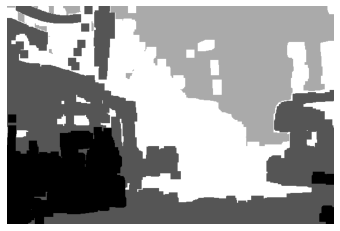

In [15]:
def cluster(file_pathname):
    for filename in os.listdir(file_pathname):
    #读取原始图像灰度颜色
        if filename.startswith('.') and os.path.isfile(os.path.join(file_pathname, filename)):
            os.listdir(file_pathname).remove(filename)
        else:
                img = cv2.imread(file_pathname+'/'+filename,0) 
        
#print (img.shape)
                rows, cols = img.shape[:]

                data = img.reshape((rows * cols, 1))
                data = np.float32(data)
                criteria = (cv2.TERM_CRITERIA_EPS +cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
                flags = cv2.KMEANS_RANDOM_CENTERS
                compactness, labels, centers = cv2.kmeans(data, 4, None, criteria, 10, flags)
                dst = labels.reshape((img.shape[0], img.shape[1]))
                plt.rcParams['font.sans-serif']=['SimHei']

#plt.imshow(img,'gray')
                plt.axis('off')  
                plt.imshow(dst,'gray')
                plt.savefig('./cluster-4'+'/'+filename,bbox_inches='tight',pad_inches=0)
cluster('./gray')

In [11]:
def zoom(img):
    img[:1,:1,:] = 0
    pt1 = (500,510)
    pt2 = (1400,800)
    patch = img[pt1[1]:pt2[1],pt1[0]:pt2[0],:]
    patch = cv2.resize(patch, (pt2[0]-pt1[0], pt2[1]-pt1[1]))
    return patch

zoom & detect

In [12]:
def detect(file_pathname):
    for filename in os.listdir(file_pathname):
        if filename.startswith('.') and os.path.isfile(os.path.join(file_pathname, filename)):
            os.listdir(file_pathname).remove(filename)
        else:
            img = cv2.imread(file_pathname+'/'+filename)
            img = cv2.resize(img, (1920,1020))
            #patch = img
            patch = zoom(img)

            gray = cv2.cvtColor(patch, cv2.COLOR_BGR2GRAY)
            gray = 255 - gray
            ret, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)  
            contours, hierarchy = cv2.findContours(binary,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
            cv2.drawContours(patch,contours[1:],-1,(0,0,255),2)
            box_in_gray(patch,contours,filename)
            
            for orgname in os.listdir('./images'):
                if orgname.startswith('.') and os.path.isfile(os.path.join('./images', orgname)):
                    os.listdir('./images').remove(orgname)
                elif orgname == filename:
                    org = cv2.imread('./images/'+orgname)
                    sp = img.shape
                    #org = cv2.resize(org, (sp[1],sp[0]))
                    #patch2 = org
                    patch2 = zoom(org)
                    #box_in_org(patch2,contours,filename)
                    box_opt(patch2,contours,filename)

                    

detect('./gray')

error: OpenCV(4.6.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [2]:
# draw box
def box_in_gray(img,contours,filename):
    for i in range(len(contours)):
        w = []
        h = []
        for j in range (0, len(contours[i])):
            w.append(contours[i][j][0][0])
            h.append(contours[i][j][0][1])
        l = min(w)
        r = max(w)
        u = min(h)
        d = max(h)
        pt1 = (l,u)
        pt2 = (r,d)
        cv2.rectangle(img, pt1, pt2, (255, 0, 0), 2)
        #cv2.imwrite('./graybox'+'/'+filename,img)
        cv2.imwrite('./graybox2'+'/'+filename,img)


In [8]:
# draw box
def box_in_org(img,contours,filename):
    for i in range(len(contours)):
        w = []
        h = []
        for j in range (0, len(contours[i])):
            w.append(contours[i][j][0][0])
            h.append(contours[i][j][0][1])
        l = min(w)
        r = max(w)
        u = min(h)
        d = max(h)
        pt1 = (l,u)
        pt2 = (r,d)
        cv2.rectangle(img, pt1, pt2, (255, 0, 0), 2)
        cv2.imwrite('./org_zoom'+'/'+filename,img)


In [3]:
# draw box
def box_opt(img,contours,filename):
    for i in range(len(contours)):
        w = []
        h = []
        for j in range (0, len(contours[i])):
            w.append(contours[i][j][0][0])
            h.append(contours[i][j][0][1])
        l = min(w)
        r = max(w)
        u = min(h)
        d = max(h)
        pt1 = (l,u)
        pt2 = (r,d)
        s = (abs(l-r))*(abs(u-d))
        #if 1000<s:
        cv2.rectangle(img, pt1, pt2, (255, 0, 0), 2)
        #cv2.imwrite('./opt'+'/'+filename,img)
        cv2.imwrite('./opt2'+'/'+filename,img)


In [10]:
def put(file_pathname):
    for filename in os.listdir(file_pathname):
        if filename.startswith('.') and os.path.isfile(os.path.join(file_pathname, filename)):
            os.listdir(file_pathname).remove(filename)
            #img = cv2.imread(file_pathname+'/'+filename)
        for orgname in os.listdir('./images'):
            if orgname.startswith('.') and os.path.isfile(os.path.join('./images', orgname)):
                os.listdir('./images').remove(orgname)
            elif orgname == filename:
                img = cv2.imread(file_pathname+'/'+filename)
                org = cv2.imread('./images/'+orgname)
                org[510:800,500:1400] = img
                cv2.imwrite('./re/'+filename, org)
               

put('./org_zoom')